# Random Forest - Classification Task

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Titanic/train.csv")

In [3]:
col = ["PassengerId", "Name", "Ticket", "Cabin"]
data = data.drop(col, axis = 1)

In [4]:
print(data.head())
print(data.shape)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
(891, 8)


In [5]:
data = data.dropna()
print("No of observations in the data frame : {}".format(data.shape[0]))

No of observations in the data frame : 712


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
print(data)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.0      1      0   7.2500         2
1           1       1    0  38.0      1      0  71.2833         0
2           1       3    0  26.0      0      0   7.9250         2
3           1       1    0  35.0      1      0  53.1000         2
4           0       3    1  35.0      0      0   8.0500         2
..        ...     ...  ...   ...    ...    ...      ...       ...
885         0       3    0  39.0      0      5  29.1250         1
886         0       2    1  27.0      0      0  13.0000         2
887         1       1    0  19.0      0      0  30.0000         2
889         1       1    1  26.0      0      0  30.0000         0
890         0       3    1  32.0      0      0   7.7500         1

[712 rows x 8 columns]


In [7]:
y = data["Survived"]
X = data.drop("Survived", axis = 1)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
rf = RandomForestClassifier(n_estimators=100, oob_score = True, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [11]:
threshold = 0.5
predicted_labels = np.empty(len(y_pred), dtype = int)
for i in range(len(y_pred)):
    if y_pred[i] >= threshold:
        predicted_labels[i] = 1
    else:
        predicted_labels[i] = 0
        
print(predicted_labels)

[1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0]


In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cm = confusion_matrix(y_test, predicted_labels)
print(cm)

[[80 19]
 [22 57]]


In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)

Sensitivity: 0.7215189873417721
Specificity: 0.8080808080808081
Accuracy: 0.7696629213483146


In [15]:
test_data = pd.read_csv("Titanic/test.csv")

In [16]:
test_data = test_data.drop(col, axis = 1)

In [17]:
test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])
test_data = test_data.dropna()

In [18]:
test_data = test_data.dropna()
print("No of observations in the test data frame : {}".format(test_data.shape[0]))

No of observations in the test data frame : 331


In [19]:
test_pred = rf.predict(test_data)

In [20]:
predicted_test_labels = np.empty(len(test_pred), dtype = int)
for i in range(len(test_pred)):
    if test_pred[i] >= threshold:
        predicted_test_labels[i] = 1
    else:
        predicted_test_labels[i] = 0
        
print(predicted_test_labels)

[0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0]


In [21]:
test_data["Predicted_Labels"] = predicted_test_labels
print(test_data)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Predicted_Labels
0         3    1  34.5      0      0    7.8292         1                 0
1         3    0  47.0      1      0    7.0000         2                 0
2         2    1  62.0      0      0    9.6875         1                 0
3         3    1  27.0      0      0    8.6625         2                 1
4         3    0  22.0      1      1   12.2875         2                 0
..      ...  ...   ...    ...    ...       ...       ...               ...
409       3    0   3.0      1      1   13.7750         2                 1
411       1    0  37.0      1      0   90.0000         1                 1
412       3    0  28.0      0      0    7.7750         2                 1
414       1    0  39.0      0      0  108.9000         0                 1
415       3    1  38.5      0      0    7.2500         2                 0

[331 rows x 8 columns]


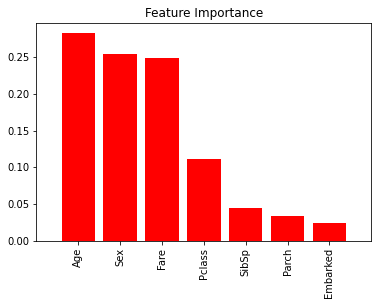

In [22]:
import matplotlib.pyplot as plt

# get the feature importances from the random forest model
importances = rf.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# get the names of the features
features = X.columns

# plot the mean decrease Gini and mean decrease accuracy
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


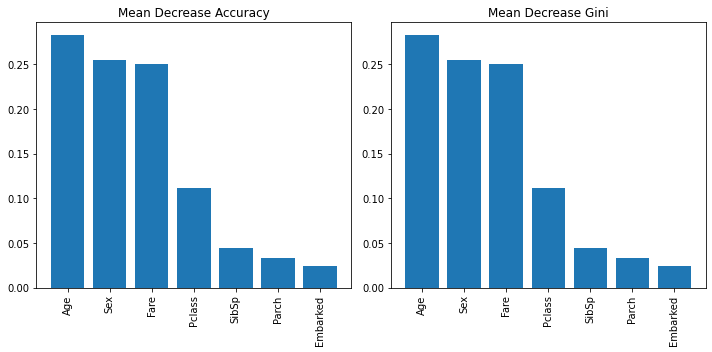

In [23]:
importance_meandecreaseaccuracy = rf.feature_importances_
importance_meandecreasegini = rf.feature_importances_

feature_names = X.columns

indices_meandecreaseaccuracy = np.argsort(importance_meandecreaseaccuracy)[::-1]
indices_meandecreasegini = np.argsort(importance_meandecreasegini)[::-1]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Mean Decrease Accuracy")
plt.bar(range(X.shape[1]), importance_meandecreaseaccuracy[indices_meandecreaseaccuracy])
plt.xticks(range(X.shape[1]), feature_names[indices_meandecreaseaccuracy], rotation=90)
plt.subplot(1,2,2)
plt.title("Mean Decrease Gini")
plt.bar(range(X.shape[1]), importance_meandecreasegini[indices_meandecreasegini])
plt.xticks(range(X.shape[1]), feature_names[indices_meandecreasegini], rotation=90)
plt.tight_layout()
plt.show()

**The number of variables to be cnsidererd at each node in the case that we have 36 variables is 6.**